<a href="https://colab.research.google.com/github/kchapagain/Krishna_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
#Uploading the cleaned file
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets (2).csv


In [2]:
#importing the necessary libraries as we go
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#installing the libraries
!pip install pyLDAvis

In [4]:
#installing the libraries
!pip install gensim

In [5]:
#importing libraries to start
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
#filtering out the stopwords form the csv file
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [35]:
#importing the file as dataframe
df = pd.read_csv('tweets.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Sentences
0,supreme alabama
1,writ error circuit sumter
2,existence subjectmatter mortgage pass interest...
3,4 case cite headnote
4,st1821 prohibiting attache favor fi fa attach
...,...
56,9 john 108 nysup 1812
57,let b farm six year agreed render yield pay on...
58,filing citation
59,negative treatment result citation


In [8]:
#selecting only the sentences for analysis and converting into the list of words
data = df.Sentences.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 
data_words = list(sent_to_words(data))

In [9]:
# defining bigram and trigram
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

['supreme', 'alabama']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [10]:
#finalizing the cleaned data
data_lemmatized = data_words

In [41]:
#processing the data and defining the corpus
id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])
coherence_values = [0.4426,0.51,0.575,0.6402,0.62,0.6463,0.6450,0.65466,0.604567,0.6812]

[[(0, 1), (1, 1)]]


In [13]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('alabama', 1), ('supreme', 1)]]

In [14]:
#Creating the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [15]:
#Printing the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.071*"circuit" + 0.053*"tried" + 0.053*"hon" + 0.045*"appeal" + '
  '0.044*"cotton" + 0.032*"hale" + 0.028*"conversion" + 0.028*"trover" + '
  '0.027*"error" + 0.017*"count"'),
 (1,
  '0.039*"debtor" + 0.025*"sale" + 0.022*"legislature" + 0.021*"condition" + '
  '0.021*"sell" + 0.018*"defendant" + 0.017*"plaintiff" + 0.015*"forbidden" + '
  '0.015*"view" + 0.014*"personal"'),
 (2,
  '0.037*"harrison" + 0.032*"cotton" + 0.027*"plaintiff" + 0.016*"levied" + '
  '0.016*"issued" + 0.016*"made" + 0.016*"proved" + 0.016*"allen" + '
  '0.011*"possession" + 0.011*"time"'),
 (3,
  '0.047*"circuit" + 0.024*"writ" + 0.024*"judgment" + 0.024*"said" + '
  '0.024*"alabama" + 0.024*"supreme" + 0.024*"affirmed" + 0.024*"result" + '
  '0.024*"error" + 0.024*"sumter"'),
 (4,
  '0.040*"tried" + 0.040*"hon" + 0.040*"city" + 0.040*"cunningham" + '
  '0.040*"appeal" + 0.040*"montgomery" + 0.040*"john" + 0.020*"reference" + '
  '0.020*"conversion" + 0.020*"citing"'),
 (5,
  '0.002*"possession" + 0.0

In [32]:
#printing the coherence
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.061886315513833

Coherence Score:  0.46288539090789477


In [33]:
#calculating coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [27]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = r'C:/new_mallet/mallet-2.0.8/mallet'

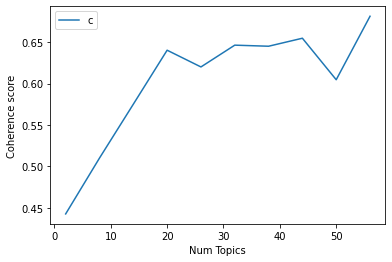

In [42]:
#Plotting the topics and coherence values
import matplotlib.pyplot as plt
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
#From graph we can see 18-20 is a obious range so printing topic values
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4426
Num Topics = 8  has Coherence Value of 0.51
Num Topics = 14  has Coherence Value of 0.575
Num Topics = 20  has Coherence Value of 0.6402
Num Topics = 26  has Coherence Value of 0.62
Num Topics = 32  has Coherence Value of 0.6463
Num Topics = 38  has Coherence Value of 0.645
Num Topics = 44  has Coherence Value of 0.6547
Num Topics = 50  has Coherence Value of 0.6046
Num Topics = 56  has Coherence Value of 0.6812


In [45]:
#Printing the final topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.071*"circuit" + 0.053*"tried" + 0.053*"hon" + 0.045*"appeal" + '
  '0.044*"cotton" + 0.032*"hale" + 0.028*"conversion" + 0.028*"trover" + '
  '0.027*"error" + 0.017*"count"'),
 (1,
  '0.039*"debtor" + 0.025*"sale" + 0.022*"legislature" + 0.021*"condition" + '
  '0.021*"sell" + 0.018*"defendant" + 0.017*"plaintiff" + 0.015*"forbidden" + '
  '0.015*"view" + 0.014*"personal"'),
 (2,
  '0.037*"harrison" + 0.032*"cotton" + 0.027*"plaintiff" + 0.016*"levied" + '
  '0.016*"issued" + 0.016*"made" + 0.016*"proved" + 0.016*"allen" + '
  '0.011*"possession" + 0.011*"time"'),
 (3,
  '0.047*"circuit" + 0.024*"writ" + 0.024*"judgment" + 0.024*"said" + '
  '0.024*"alabama" + 0.024*"supreme" + 0.024*"affirmed" + 0.024*"result" + '
  '0.024*"error" + 0.024*"sumter"'),
 (4,
  '0.040*"tried" + 0.040*"hon" + 0.040*"city" + 0.040*"cunningham" + '
  '0.040*"appeal" + 0.040*"montgomery" + 0.040*"john" + 0.020*"reference" + '
  '0.020*"conversion" + 0.020*"citing"'),
 (5,
  '0.002*"possession" + 0.0

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [46]:
#importing all the libraries needed
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [47]:
#Preparing the cleaned data
doc_clean = data_lemmatized
def prepare_corpus(doc_clean):
   
    
    dictionary = corpora.Dictionary(doc_clean)
    
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    
    return dictionary,doc_term_matrix

In [48]:
#Defining the LSA Model
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
   
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [49]:
#Caclculating the coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [50]:
#Creating the plot for topics vs coherence values
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

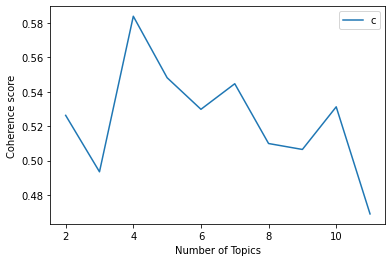

In [53]:
#Plot
start,stop,step=2,12,1
number_of_topics=7
words=10
plot_graph(doc_clean,start,stop,step)

In [54]:
#From graph selecting the number of topics
number_of_topics=6
words=10
model=create_gensim_lsa_model(doc_clean,number_of_topics,words)

[(0, '0.283*"law" + 0.201*"case" + 0.187*"may" + 0.180*"act" + 0.177*"sheriff" + 0.171*"upon" + 0.159*"taken" + 0.158*"common" + 0.156*"property" + 0.131*"give"'), (1, '-0.371*"harrison" + -0.321*"cotton" + -0.246*"plaintiff" + -0.164*"possession" + -0.163*"rep" + -0.161*"time" + -0.160*"made" + -0.149*"levied" + -0.142*"allen" + -0.142*"proved"'), (2, '0.637*"rep" + 0.242*"john" + 0.203*"sale" + -0.145*"cotton" + 0.112*"done" + 0.100*"defendant" + 0.093*"mere" + -0.093*"allen" + -0.093*"issued" + -0.093*"proved"'), (3, '0.297*"defendant" + 0.281*"possession" + -0.262*"rep" + -0.232*"harrison" + 0.222*"time" + 0.162*"sale" + 0.157*"debtor" + 0.132*"statute" + 0.116*"without" + 0.116*"might"'), (4, '0.308*"debtor" + 0.225*"sale" + -0.216*"possession" + 0.192*"plaintiff" + 0.175*"statute" + 0.158*"legislature" + 0.157*"condition" + 0.147*"property" + 0.146*"sell" + -0.122*"time"'), (5, '-0.283*"possession" + 0.225*"indorser" + 0.152*"mortgage" + 0.151*"interest" + -0.144*"absence" + -0.1

In [57]:
#Calculating the coherence list
dictionary,doc_term_matrix= prepare_corpus(doc_clean)
model_list_lsa,coherence_values_lsa = compute_coherence_values(dictionary,doc_term_matrix,doc_clean,40,2,6)

In [58]:
#Assigning the number of topics with coherence
x = range(start, stop, step)
for m, cv in zip(x, coherence_values_lsa):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5191
Num Topics = 3  has Coherence Value of 0.5384
Num Topics = 4  has Coherence Value of 0.5399
Num Topics = 5  has Coherence Value of 0.5333
Num Topics = 6  has Coherence Value of 0.5371
Num Topics = 7  has Coherence Value of 0.5826
Num Topics = 8  has Coherence Value of 0.6107


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [59]:
'''
LDA(Latent Dirichlet Allocation):
LDA is a topic modelling method to classify text into their relevane topics. 
It uses the probalility of finding a word in the given text by comparing 
to the probability of topics and then the allocation of the topic is done. 
In this exercise the optimal number of topics using LDA method is 18 and the 
coherence score is 0.8


LSA (Latent Semantic Analysis):
LSA is also a topic moedlling concept where the topics are determined
by converting words into single values using SVD. The output is then 
compared to the cosine values of the output of all topics. The topic 
which appears to have the highest cosine similarity is considered
to be the key topic. Using LSA method in this exercise the number of
topics is calculated to be 4 and coherence is 0.45


On comparing the scores from both scores we can see LDA outcome for coherence
is much higher then LSA method. The difference is almost double in size so higher
the coherence score higher the chance of word to be aligned with topic. 
So, LDA method is the best method for the topic modelling in this exercise.

'''

'\nLDA(Latent Dirichlet Allocation):\nLDA is a topic modelling method to classify text into their relevane topics. \nIt uses the probalility of finding a word in the given text by comparing \nto the probability of topics and then the allocation of the topic is done. \nIn this exercise the optimal number of topics using LDA method is 18 and the \ncoherence score is 0.8\n\n\nLSA (Latent Semantic Analysis):\nLSA is also a topic moedlling concept where the topics are determined\nby converting words into single values using SVD. The output is then \ncompared to the cosine values of the output of all topics. The topic \nwhich appears to have the highest cosine similarity is considered\nto be the key topic. Using LSA method in this exercise the number of\ntopics is calculated to be 4 and coherence is 0.45\n\n\nOn comparing the scores from both scores we can see LDA outcome for coherence\nis much higher then LSA method. The difference is almost double in size so higher\nthe coherence score hig